# Confidence interval of counted data

## Introduction

In this chapter, we will delve into the world of **counted data** and its statistical analysis using the **Poisson distribution**. Counted data, often encountered in fields such as epidemiology, traffic engineering, and social sciences, refers to data that are counted as _discrete events in a fixed time or space_.

The Poisson Distribution is a powerful statistical tool used to model such data. Named after the French mathematician Siméon Denis Poisson, it provides a way to predict the probability of certain events from happening when we know how often the event has occurred. It is particularly useful when these events happen with a known **average rate** and _independently of the time since the last event_.

We will focus on the confidence interval of counted data. Confidence intervals are a range of values that are likely to contain the true population parameter. In the context of Poisson Distribution, it provides a range where the true average rate of occurrence **lambda** (λ), sometimes called **mu** (μ), lies with a certain level of confidence.

Following the theoretical foundation, we will transition into practical Python applications, in particular using the [SciPy library](https://docs.scipy.org/doc/scipy/reference/stats.html). By the end of this chapter, we will have a solid understanding of how to apply Poisson Distribution to analyze counted data and calculate confidence intervals using Python.

## Poisson distribution

Let's start by generating two sets of random variables from the Poisson distribution using NumPy. We will compare two distributions of some background radiation counts, one with a mean of 1.6 counts/min, and the second with 7.5 counts/min.

In [20]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(111) # for reproducibility

# Set the parameters for the Poisson distribution
λ1 = 1.6 # e.g., mean radiation counts/min
λ2 = 7.5
size = 10000

# Generate random variates
data1 = np.random.poisson(λ1, size)
data2 = np.random.poisson(λ2, size)

Let's print the 15 first values of the random variate `data1`.

In [21]:
data1[:15]

array([1, 2, 0, 0, 1, 2, 0, 2, 1, 0, 7, 0, 1, 3, 1])

We then plot their histograms using Matplotlib.

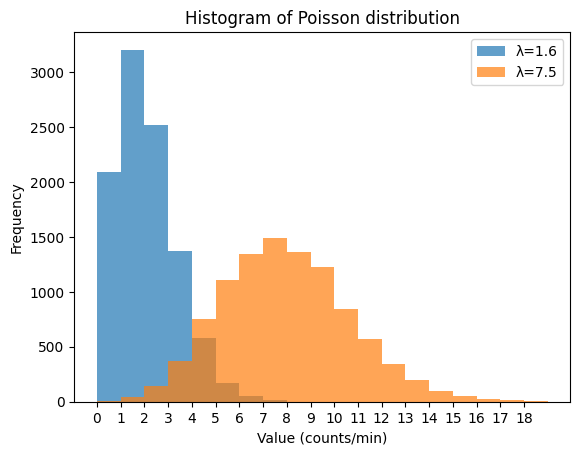

In [22]:
# Plot histograms using Matplotlib
plt.hist(data1, bins=range(min(data1), max(data1) + 1), alpha=0.7, label='λ=1.6')
plt.hist(data2, bins=range(min(data2), max(data2) + 1), alpha=0.7, label='λ=7.5')
plt.title('Histogram of Poisson distribution')
plt.xlabel('Value (counts/min)')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 19, 1))
plt.legend(loc='upper right');

We can do similar things using theSciPy and seaborn packages.

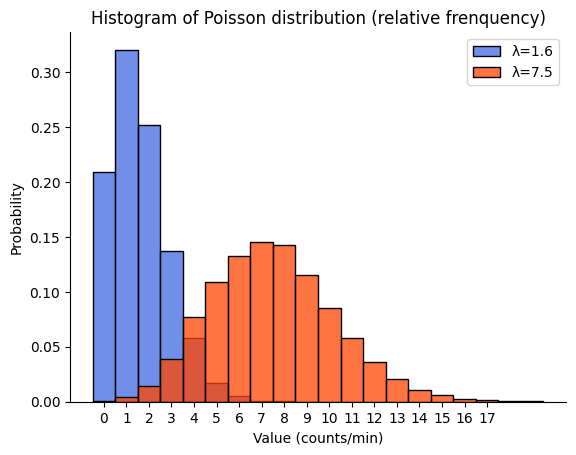

In [23]:
from scipy.stats import poisson
import seaborn as sns

sns.histplot(
    poisson(λ1).rvs(size=size, random_state=111), # for reproducibility
    stat='probability',
    binwidth=1,
    discrete=True,
    label=f"λ={λ1}",
    color='royalblue',
)
sns.histplot(
    poisson(λ2).rvs(size=size, random_state=111),
    stat='probability',
    binwidth=1,
    discrete=True,
    label=f"λ={λ2}",
    color='orangered',
)

plt.title('Histogram of Poisson distribution (relative frenquency)')
plt.xlabel('Value (counts/min)')
plt.ylabel('Probability')
plt.xticks(np.arange(0, 18, 1))
plt.legend(loc='upper right')
sns.despine();

Remember, the Poisson distribution is **discrete**, so the values on the x-axis represent specific counts of events. The y-axis represents the frequency of these counts in our data set. The separation between the two histograms reflects the difference in the λ parameters of the two distributions. The distribution with λ=1.6 is skewed to the right and has a peak at lower values, while the distribution with λ=7.5 is more spread out and has a peak at higher values. This is consistent with the property of the Poisson distribution that its mean and variance are both equal to λ.

## Confidence interval

### Example of raisins in bagels

We'll use the [`scipy.stats` Poisson distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson) with an average λ=10 raisins per bagel.

The Poisson distribution is a great fit for this scenario because it models the number of times an event (in this case, a raisin appearing in a bagel) occurs in a fixed interval of time or space. Here, our "fixed space" is the bagel, and the "event" is the appearance of a raisin.

We'll generate a sample data set, extract the 2.5th and 97.5th percentiles out of this data, which represent the lower and upper bounds of the 95% confidence interval, respectively, and plot the histogram.

The 95% confidence interval (bootstrap) is [ 4. 17.]


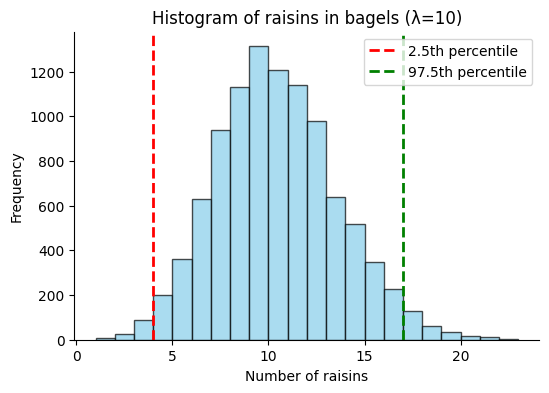

In [24]:
# Set the parameters for the Poisson distribution
λ = 10 # average number of raisins in each bagel
size = 10000

# Generate random variables
data = poisson.rvs(λ, size=size, random_state=111) # for reproducibility

# Calculate the confidence interval
conf_int = np.percentile(data, [2.5, 97.5])

# Print the confidence interval
print(f"The 95% confidence interval (bootstrap) is {conf_int}")

# Plot histogram
plt.figure(figsize=(6, 4))
plt.hist(
    data,
    bins=range(min(data), max(data) + 1), # type: ignore
    alpha=0.7,
    color='skyblue',
    edgecolor='black',)
plt.axvline(
    x=conf_int[0], color='red', linestyle='dashed', linewidth=2, label='2.5th percentile')
plt.axvline(
    x=conf_int[1], color='green', linestyle='dashed', linewidth=2, label='97.5th percentile')
plt.title(f'Histogram of raisins in bagels (λ={λ})')
plt.xlabel('Number of raisins')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
sns.despine();

### A shortcut approximation

As discussed in the last chapters, the **central limit theorem** states that the sum of a _large number_ of independent and identically distributed random variables will approximately follow a _normal distribution_, regardless of the shape of their original distribution. In the case of the Poisson distribution, as λ gets larger, the distribution becomes more symmetric and starts to look like a normal distribution.

When the count values are large (typically, λ > 30 is considered large enough), we can use the **normal approximation** to the Poisson distribution to calculate the confidence interval. The standard deviation of a Poisson distribution is the square root of λ (for Poisson distribution, the mean AND the variance are equal to λ), so the standard error (which is the standard deviation of the sample mean) is the standard deviation divided by the square root of the sample size.

Therefore the *approximation for the 95% confidence interval* ranges from $\lambda - 1.96 \times \sqrt{\lambda}$ to $\lambda + 1.96 \times \sqrt{\lambda}$.

In [25]:
λ - 1.96 * np.sqrt(λ) , λ + 1.96 * np.sqrt(λ)

(3.8019357860699765, 16.198064213930024)

### Percent point function

The `ppf` stands for **percent point function**, which is essentially the inverse of the cumulative distribution function (CDF). The `ppf` takes a probability q and returns a value x such that the probability of the random variable being less than or equal to x is equal to q. In other words, it allows us to determine the value below which a given percentage of the data falls.

In the context of the Poisson distribution, the `ppf` can be used to calculate the value below which a certain percentage of the counts of events (e.g., raisins in bagels) fall. This can be particularly useful when we want to determine the confidence interval around the mean of the distribution.

In [26]:
# Set the parameters for the Poisson distribution
λ = 10  # beware, `lambda` is a Python reserved name
size = 10000

# Prepare the model of this distribution
model = poisson(mu=λ)

# Calculate the confidence interval using ppf
conf_int = [model.ppf(0.025), model.ppf(0.975)]

# Print the confidence interval
print(f"The 95% confidence interval for λ={λ} is {conf_int}")

The 95% confidence interval for λ=10 is [4.0, 17.0]


### Lollipop plot

The **probability mass function** (PMF) of the Poisson distribution gives the probability of each possible outcome. In this case, it will give the probability of each possible count of events (e.g., raisins in a bagel).

We first generate the x values using the `ppf` function to get the range of values that contain 98% of the probability. We then calculate the PMF for these x values using the `pmf` function. Finally, we create the lollipop plot using the [`stem` function in Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.stem.html).

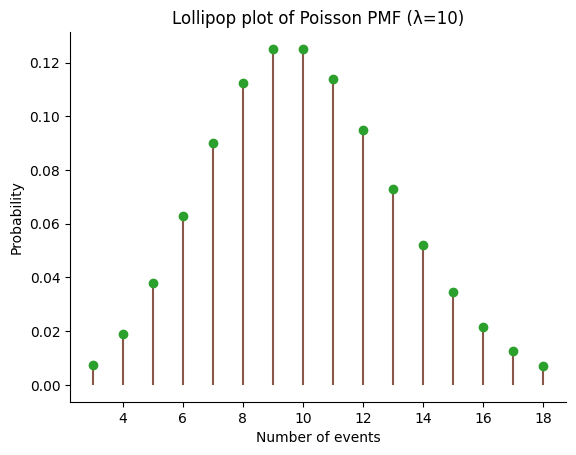

In [27]:
# Set the parameters for the Poisson distribution
λ = 10
model = poisson(mu=λ)

# Generate the x values
x = np.arange(
    model.ppf(0.01),
    model.ppf(0.99) + 1,
    # step=1,
)

# Calculate the PMF
pmf = model.pmf(x) # type: ignore

# Create the lollipop plot
plt.stem(x, pmf, markerfmt="C2o", linefmt="C5-", basefmt=" ")

# alernatively we can plot points + vertical lines
#plt.plot(x, model.pmf(x), 'ro', ms=8)
#plt.vlines(x, 0, model.pmf(x), colors='grey', lw=4, alpha=.5)

plt.title(f'Lollipop plot of Poisson PMF (λ={λ})')
plt.xlabel('Number of events')
plt.ylabel('Probability')
sns.despine();

### Example of radioactive count

Let's create a Poisson model for radioactive counts with an average rate λ=120. We'll generate a sample data set, calculate its mean and variance, and estimate the confidence interval.

In [28]:
# Set the parameters for the Poisson distribution
λ = 120
size = 10000

# Generate random variables
desintegration_poisson_model = poisson(mu=λ)
data = desintegration_poisson_model.rvs(size=size)

# Calculate the sample mean and variance
sample_mean = np.mean(data)
sample_variance = np.var(data)

# Calculate the confidence interval using 2.5th and 97.5th percentiles
conf_int = np.percentile(data, [2.5, 97.5])

print(f"λ={λ}")
print(f"Sample mean: {sample_mean}")
print(f"Sample variance: {sample_variance}")
print(f"95% confidence interval (bootstrap): {conf_int}")


λ=120
Sample mean: 119.8975
Sample variance: 122.58519375
95% confidence interval (bootstrap): [ 98. 142.]


There are several methods in the `scipy.stats.poisson` module that might be useful:

- `mean`, `median` and `std`: these methods return, respectively, the mean, median and standard deviation of the Poisson distribution. For a Poisson distribution, the mean is equal to λ, which is the average rate of events.
- `stats`: this method returns the mean ('m'), variance ('v'), skew ('s'), and/or kurtosis ('k') of the Poisson distribution. By default, it returns the mean and variance.
- `interval`: this method returns the endpoints of the range that contains alpha percent of the distribution. For example, we can use it to calculate the confidence interval with equal areas around the median.

In [29]:
print(f"Mean of the distribution = {desintegration_poisson_model.mean()}")
print(f"Variance of the distribution = {desintegration_poisson_model.stats(moments='v')}")
print(f"Standard deviation of the distribution = {desintegration_poisson_model.std():.3f}")
print(f"95% confidence interval with equal areas around the median = \
{desintegration_poisson_model.interval(.95)}")
print(f"2.5 PPF = {desintegration_poisson_model.ppf(0.025)}")
print(f"97.5 PPF = {desintegration_poisson_model.ppf(0.975)}")

Mean of the distribution = 120.0
Variance of the distribution = 120.0
Standard deviation of the distribution = 10.954
95% confidence interval with equal areas around the median = (99.0, 142.0)
2.5 PPF = 99.0
97.5 PPF = 142.0


In [30]:
# method used for large count values (>30) as it approximates Gaussian distribution
(λ - 1.96 * λ**.5 , λ + 1.96 * λ**.5)

(98.52927574579749, 141.4707242542025)

### Advantage of counting for longer time intervals or in larger volumes

When we count events over longer time intervals or in larger volumes, the mean of the Poisson distribution λ increases. This results in a *narrower confidence interval*, which means our estimate of the average rate of events becomes more precise.

Let's illustrate this with Python code. We'll create two Poisson models: one with a mean of 700 events per minute, and another with a mean of 7000 events per 10 minutes.

The 95% confidence interval for lambda=700 is (649.0, 752.0)
The 95% confidence interval for lambda=7000 is (6836.0, 7164.0)


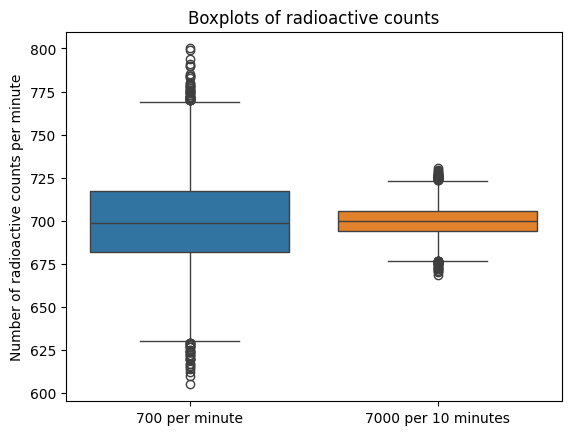

In [31]:
# Set the parameters for the Poisson distribution
λ1 = 700  # 700 events per minute
λ2 = 7000  # 7000 events per 10 minutes
size = 10000

# Generate random variables
data1 = poisson.rvs(λ1, size=size)
data2 = poisson.rvs(λ2, size=size)

# Calculate the confidence intervals
conf_int1 = poisson.interval(0.95, λ1)
conf_int2 = poisson.interval(0.95, λ2)

print(f"The 95% confidence interval for lambda=700 is {conf_int1}")
print(f"The 95% confidence interval for lambda=7000 is {conf_int2}")

# Create boxplots
sns.boxplot(data=[data1, data2/10]) # normalize the second dataset
plt.xticks([0, 1], ['700 per minute', '7000 per 10 minutes'])
plt.title('Boxplots of radioactive counts')
plt.ylabel('Number of radioactive counts per minute');

When dealing with count data, especially in the context of a Poisson distribution, it's important to compute the confidence interval with the actual counts first and only then normalize by the time interval (or space interval) for several reasons:

1. Discreteness of count data: count data are discrete, meaning they can only take on integer values (0, 1, 2, 3, …). The Poisson distribution, which is often used to model count data, is a discrete probability distribution. Therefore, it's appropriate to calculate the confidence interval based on the actual counts, which are also discrete.
2. Preservation of variability: the actual counts capture the inherent variability in the data. When we divide by the time interval, we're essentially normalizing or standardizing the data, which can mask some of this variability. Calculating the confidence interval with the actual counts ensures that this variability is taken into account.
3. Accuracy of confidence interval: the confidence interval calculated with the actual counts gives the range of values that the true count is likely to fall within, with a certain level of confidence. If we were to divide by the time interval before calculating the confidence interval, the resulting interval would not accurately reflect the variability in the counts.

After calculating the confidence interval with the actual counts, we can then divide by the time interval to get the average rate of events per unit of time. This gives us a normalized measure, or the *average rate of events per unit of time* (or per unit of space), that is easier to interpret and compare across different time intervals or space intervals.

Remember, this normalization is valid under the assumption that the events are occurring at a constant average rate. If the rate is not constant, the confidence interval for the average rate per unit of time might not be accurate.

In [32]:
print(f"The 95% confidence interval for the average rate λ=700/minute is \
{[bound/10 for bound in conf_int2]}")

The 95% confidence interval for the average rate λ=700/minute is [683.6, 716.4]


### Inference for Poisson data

While `statsmodels` does not have a function directly equivalent to `statsmodels.stats.proportion_confint` specifically for Poisson distributions, we can still utilize functions within the [`statsmodels.stats.rates` module](https://www.statsmodels.org/dev/generated/statsmodels.stats.rates.confint_poisson.html) for confidence interval calculation and hypothesis testing for Poisson data. The function calculates the confidence interval for a Poisson rate, providing multiple methods. For _smaller sample sizes or lower rates_, consider using _exact methods_ (e.g., "exact-c" or "midp-c") for more accurate confidence intervals. For _larger sample sizes or higher rates_, _asymptotic approximations_ (e.g., "score" or "wald") can be sufficient and computationally faster.

In [33]:
import statsmodels.stats.rates as smr

# Example data: Number of events observed
count1 = 700
count2 = 7000

# Exposure (e.g., time, area or volume)
exposure1 = 1
exposure2 = 10

# Calculate 95% confidence interval using the "exact-c" method
ci1 = smr.confint_poisson(count1, exposure1, method='score')
ci2 = smr.confint_poisson(count2, exposure2, method='score')

print(f"95% CI (asymptotic approx) for λ=700/min: {ci1}")
print(f"95% CI (asymptotic approx) for λ=7000/10min: {ci2}")

95% CI (asymptotic approx) for λ=700/min: (650.0293970324473, 753.8120617882468)
95% CI (asymptotic approx) for λ=7000/10min: (683.7927129089095, 716.59143297316)


### Zero count

In this section, we will explore the scenario where the observed number of events is 0. This corresponds to a Poisson distribution with a mean λ = 0.

The Poisson distribution is defined for all non-negative integers, so having an observed number of 0 is a valid scenario. However, if the mean of the distribution is 0, it means that the event is not expected to occur at all in the given interval of time or space.

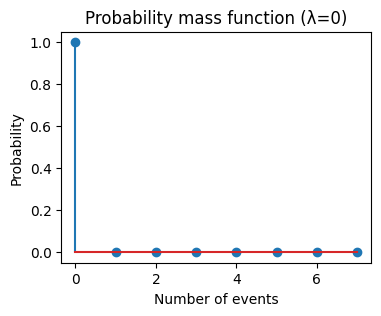

In [34]:
# Set the parameters for the Poisson distribution
λ = 0

# Generate the x values
x = np.arange(0, 8)

# Calculate the PMF
pmf = poisson.pmf(x, λ)

# Create the plot
plt.figure(figsize=(4,3))
plt.stem(x, pmf)
# plt.plot(x, pmf, 'bo', ms=8, label='poisson pmf')
plt.title(f'Probability mass function (λ={λ})')
plt.xlabel('Number of events')
plt.ylabel('Probability');

As we see from the plot, the probability of observing 0 events is 1, and the probability of observing any other number of events is 0. This is consistent with our expectation that if the average rate of events λ is 0, then we should not expect to observe any events.

In the case where the mean of the Poisson distribution is 0, the confidence interval would also be 0. This is because if λ=0, then we should not expect to observe any events. Therefore, we can be 100% confident that the true average rate of occurrence lies within the interval [0, 0].

In [35]:
# Calculate the confidence interval using ppf
conf_int = [poisson.ppf(0.025, λ), poisson.ppf(0.975, λ)]

print(f"The 95% confidence interval is {conf_int}")

The 95% confidence interval is [0.0, 0.0]


If the mean of the Poisson distribution is 0.1, it means that the event is expected to occur 0.1 times on average in the given interval of time or space. This would be a rare event, but it's still possible.

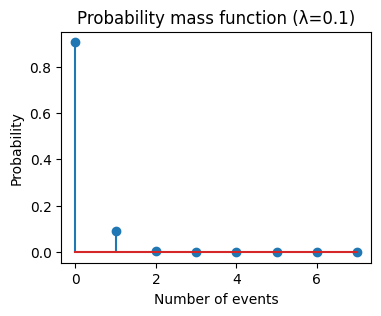

The 95% confidence interval is [0.0, 1.0]


In [36]:
# Set the parameters for the Poisson distribution
λ = 0.1

# Generate the x values
x = np.arange(0, 8)

# Calculate the PMF
pmf = poisson.pmf(x, λ)

# Create the plot
plt.figure(figsize=(4,3))
plt.stem(x, pmf)
# plt.plot(x, pmf, 'bo', ms=8, label='poisson pmf')
plt.title(f'Probability mass function (λ={λ})')
plt.xlabel('Number of events')
plt.ylabel('Probability')
plt.show()

# Calculate the confidence interval using ppf
conf_int = [poisson.ppf(0.025, λ), poisson.ppf(0.975, λ)]

print(f"The 95% confidence interval is {conf_int}")

## Conclusion

In this chapter, we delved into the fascinating world of counted data and its statistical analysis using the Poisson distribution. We explored how this powerful statistical tool can model discrete events in a fixed time or space, making it particularly useful in various fields such as epidemiology, traffic engineering, and social sciences.

We discussed several examples, including the number of raisins in bagels and radioactive counts, and showed how to generate data, calculate confidence intervals, and plot histograms for these examples. We also explored different methods available in the `scipy.stats.poisson` module, such as `pmf`, `cdf`, `ppf`, and `interval`.

We highlighted the importance of computing the confidence interval with the actual counts before normalizing by the time interval. We also discussed the advantages of counting events over longer time intervals or in larger volumes, which leads to more precise estimates of the average rate of events.

Finally, we examined special cases where the mean λ (or μ) of the Poisson distribution is 0 or close to 0, and discussed the implications of these scenarios.

## Cheat sheet

This cheat sheet provides a quick reference for essential code snippets used in this chapter.

### Poisson distribution

```python
from scipy.stats import poisson

# Parameters of the Poisson distribution
λ = 7.6  # mu or lambda

# Simulate the experiments
poisson_distribution = poisson(mu=λ)

# Calculate mean, variance (and more), median and SD from the distribution
poisson_distribution.stats(moments='mv')
poisson_distribution.mean()
poisson_distribution.median()
poisson_distribution.std()
```

### PMF Lollipop plot

```python
import numpy as np
import matplotlib.pyplot as plt

plt.stem(
    # central 98% of the distribution
    x:=np.arange(
        poisson_distribution.ppf(q=.01), # Percent Point Function
        poisson_distribution.ppf(q=.99) + 1,
        step=1),
    poisson_distribution.pmf(x),)
```

### Probabilities

```python
# Probability Mass Function - P(X=5)
poisson_distribution.pmf(k=5)

# Cumulative Distribution Function - P(X<=3)
poisson_distribution.cdf(x=3)

# Survival Function - P(X>6) or P(X>=7)
poisson_distribution.sf(x=6)
```

### Confidence Interval

```python
# Generate random variates
size = 10000  # number of simulations
experiments = poisson_distribution.rvs(size=size)
# experiments = poisson.rvs(mu=λ, size=size)

# Bootstrap 95% percentiles
np.percentile(experiments, [2.5, 97.5])

# 95% CI Normal approximation for large count values (>30)
(λ - 1.96 * np.sqrt(λ), λ + 1.96 * np.sqrt(λ))

# 95% CI with equal areas around the median
poisson_distribution.interval(confidence=.95)

# Hypothesis testing for Poisson data
import statsmodels.stats.rates as smr

# Parameters of the Poisson distribution
count = 7000   # observed count
exposure = 10  # total exposure time/area/volume

smr.confint_poisson(
    count=count,
    exposure=exposure,
    method='score', # or 'wald' for higher rates; 'exact-c' or 'midp-c' for lower rates
    alpha=0.05,)
```

## Session information

The output below details all packages and version necessary to reproduce the results in this report.

In [37]:
!python --version
print("-------------")

from importlib.metadata import version

# List of packages we want to check the version
packages = ['numpy', 'scipy', 'statsmodels', 'matplotlib', 'seaborn']

# Initialize an empty list to store the versions
versions = []

# Loop over the packages
for package in packages:
    try:
        # Get the version of the package
        package_version = version(package)
        # Append the version to the list
        versions.append(package_version)
    except Exception:  # Use a more general exception for broader compatibility
        versions.append('Not installed')

# Print the versions
for package, version in zip(packages, versions):
    print(f'{package}: {version}')

Python 3.12.7
-------------
numpy: 1.26.4
scipy: 1.14.1
statsmodels: 0.14.2
matplotlib: 3.9.2
seaborn: 0.13.2
